<a href="https://colab.research.google.com/github/SumiranRai/MDSC-Lab/blob/main/MDSC-201-Statistical-Methods-Using-R/R_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R Programming Assignment VI

By Sumiran Rai

Roll No: 24040208007

# **Breast Cancer Detection Using Linear Regression in R**


## Wisconsin Diagnostic Breast Cancer (WDBC) Dataset

### Overview
The WDBC dataset is used for breast cancer classification, distinguishing between malignant (cancerous) and benign (non-cancerous) tumors based on numerical features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

### Dataset Details
- Samples: 569
- Features: 30 numerical + 1 target (`Diagnosis`)
- Target Variable:
  - Malignant (M) → `1`
  - Benign (B) → `0`

### Feature Categories
Each feature represents a specific property of the cell nuclei and is measured in three variations: Mean, Standard Error (SE), and Worst (Largest Value):

1. **Radius** – Mean of distances from the center to points on the perimeter
2. **Texture** – Standard deviation of gray-scale values
3. **Perimeter** – Perimeter of the tumor
4. **Area** – Area of the tumor
5. **Smoothness** – Local variation in radius lengths
6. **Compactness** – (Perimeter² / Area - 1.0)
7. **Concavity** – Severity of concave portions of the contour
8. **Concave Points** – Number of concave portions of the contour
9. **Symmetry** – Symmetry of the tumor shape
10. **Fractal Dimension** – "Coastline Approximation" or complexity of the tumor boundary

### Class Distribution
- **Malignant (1):** 212 (~37.3%)
- **Benign (0):** 357 (~62.7%)

### Preprocessing Steps
✔ **Removed `ID` column**  
✔ **Converted `Diagnosis` to binary values (`M = 1`, `B = 0`)**  
✔ **Saved the transformed dataset as `transformed_wdbc.csv`**  

### Objective
The goal is to build a **classification model** to classify breast tumors as **malignant or benign** using logistic regression and evaluate its performance using metrics like **confusion matrix, F1-score, ROC-AUC, and Precision-Recall curve**.

### Pre-processing the Data

In [6]:
# Load necessary libraries
install.packages("ggplot2")  # For visualization
install.packages("pROC")  # For ROC and AUC
install.packages("dplyr")  # For data manipulation
install.packages("tibble") # For special table

library(ggplot2)
library(pROC)
library(dplyr)
library(tibble)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# Load the dataset from GitHub
url <- "https://raw.githubusercontent.com/SumiranRai/MDSC-Lab/main/MDSC-201-Statistical-Methods-Using-R/wdbc.data"
data <- read.csv(url, header = FALSE)

In [8]:
# Assign proper column names
colnames(data) <- c("ID", "Diagnosis", paste0(rep(c("radius", "texture", "perimeter", "area",
                                                     "smoothness", "compactness", "concavity",
                                                     "concave_points", "symmetry", "fractal_dimension"),
                                                   each=3), rep(1:3, 10)))


In [9]:
# Convert to tibble for better display
data <- as_tibble(data)

In [10]:
# Print first few rows
cat("\nData Preview (First Few Rows):\n")
print(head(data))


Data Preview (First Few Rows):
# A tibble: 6 × 32
      ID Diagnosis radius1 radius2 radius3 texture1 texture2 texture3 perimeter1
   <int> <chr>       <dbl>   <dbl>   <dbl>    <dbl>    <dbl>    <dbl>      <dbl>
1 8.42e5 M            18.0    10.4   123.     1001    0.118    0.278      0.300 
2 8.43e5 M            20.6    17.8   133.     1326    0.0847   0.0786     0.0869
3 8.43e7 M            19.7    21.2   130      1203    0.110    0.160      0.197 
4 8.43e7 M            11.4    20.4    77.6     386.   0.142    0.284      0.241 
5 8.44e7 M            20.3    14.3   135.     1297    0.100    0.133      0.198 
6 8.44e5 M            12.4    15.7    82.6     477.   0.128    0.17       0.158 
# ℹ 23 more variables: perimeter2 <dbl>, perimeter3 <dbl>, area1 <dbl>,
#   area2 <dbl>, area3 <dbl>, smoothness1 <dbl>, smoothness2 <dbl>,
#   smoothness3 <dbl>, compactness1 <dbl>, compactness2 <dbl>,
#   compactness3 <dbl>, concavity1 <dbl>, concavity2 <dbl>, concavity3 <dbl>,
#   concave_points1 

In [11]:
# Display column names
cat("\nColumn Names:\n")
print(colnames(data))


Column Names:
 [1] "ID"                 "Diagnosis"          "radius1"           
 [4] "radius2"            "radius3"            "texture1"          
 [7] "texture2"           "texture3"           "perimeter1"        
[10] "perimeter2"         "perimeter3"         "area1"             
[13] "area2"              "area3"              "smoothness1"       
[16] "smoothness2"        "smoothness3"        "compactness1"      
[19] "compactness2"       "compactness3"       "concavity1"        
[22] "concavity2"         "concavity3"         "concave_points1"   
[25] "concave_points2"    "concave_points3"    "symmetry1"         
[28] "symmetry2"          "symmetry3"          "fractal_dimension1"
[31] "fractal_dimension2" "fractal_dimension3"


In [12]:
# Display shape of the dataset
cat("\nShape of Data (Rows, Columns):\n")
print(dim(data))


Shape of Data (Rows, Columns):
[1] 569  32


In [13]:
# Display data types
cat("\nData Types:\n")
print(sapply(data, class))


Data Types:
                ID          Diagnosis            radius1            radius2 
         "integer"        "character"          "numeric"          "numeric" 
           radius3           texture1           texture2           texture3 
         "numeric"          "numeric"          "numeric"          "numeric" 
        perimeter1         perimeter2         perimeter3              area1 
         "numeric"          "numeric"          "numeric"          "numeric" 
             area2              area3        smoothness1        smoothness2 
         "numeric"          "numeric"          "numeric"          "numeric" 
       smoothness3       compactness1       compactness2       compactness3 
         "numeric"          "numeric"          "numeric"          "numeric" 
        concavity1         concavity2         concavity3    concave_points1 
         "numeric"          "numeric"          "numeric"          "numeric" 
   concave_points2    concave_points3          symmetry1       

In [14]:
# Remove ID column
data <- data %>% select(-ID)  # Using dplyr

# Display column names
cat("\nColumn Names:\n")
print(colnames(data))


Column Names:
 [1] "Diagnosis"          "radius1"            "radius2"           
 [4] "radius3"            "texture1"           "texture2"          
 [7] "texture3"           "perimeter1"         "perimeter2"        
[10] "perimeter3"         "area1"              "area2"             
[13] "area3"              "smoothness1"        "smoothness2"       
[16] "smoothness3"        "compactness1"       "compactness2"      
[19] "compactness3"       "concavity1"         "concavity2"        
[22] "concavity3"         "concave_points1"    "concave_points2"   
[25] "concave_points3"    "symmetry1"          "symmetry2"         
[28] "symmetry3"          "fractal_dimension1" "fractal_dimension2"
[31] "fractal_dimension3"


In [15]:
# Convert Diagnosis to binary (M = 1, B = 0)
data$Diagnosis <- ifelse(data$Diagnosis == "M", 1, 0)

# Print first few rows
cat("\nData Preview (First Few Rows):\n")
print(head(data))


Data Preview (First Few Rows):
# A tibble: 6 × 31
  Diagnosis radius1 radius2 radius3 texture1 texture2 texture3 perimeter1
      <dbl>   <dbl>   <dbl>   <dbl>    <dbl>    <dbl>    <dbl>      <dbl>
1         1    18.0    10.4   123.     1001    0.118    0.278      0.300 
2         1    20.6    17.8   133.     1326    0.0847   0.0786     0.0869
3         1    19.7    21.2   130      1203    0.110    0.160      0.197 
4         1    11.4    20.4    77.6     386.   0.142    0.284      0.241 
5         1    20.3    14.3   135.     1297    0.100    0.133      0.198 
6         1    12.4    15.7    82.6     477.   0.128    0.17       0.158 
# ℹ 23 more variables: perimeter2 <dbl>, perimeter3 <dbl>, area1 <dbl>,
#   area2 <dbl>, area3 <dbl>, smoothness1 <dbl>, smoothness2 <dbl>,
#   smoothness3 <dbl>, compactness1 <dbl>, compactness2 <dbl>,
#   compactness3 <dbl>, concavity1 <dbl>, concavity2 <dbl>, concavity3 <dbl>,
#   concave_points1 <dbl>, concave_points2 <dbl>, concave_points3 <dbl>,
#  

In [16]:
# Save the transformed dataset
write.csv(data, "transformed_wdbc.csv", row.names = FALSE)

### Training the Logistic Regression Model

In [17]:
# Train-Test Split (70-30)
set.seed(7)  # For reproducibility
train_idx <- sample(1:nrow(data), size = 0.7 * nrow(data))
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

In [18]:
# Fitting a Linear Regression Model
model <- lm(Diagnosis ~ ., data = train_data)

In [19]:
# Predict probabilities on test data
pred_probs <- predict(model, newdata = test_data, type = "response")

In [20]:
# Convert probabilities to binary predictions
pred_labels <- ifelse(pred_probs > 0.5, 1, 0)

### Confusion Matrix

In [21]:
# Confusion Matrix Calculation
actual <- test_data$Diagnosis
TP <- sum(actual == 1 & pred_labels == 1)
TN <- sum(actual == 0 & pred_labels == 0)
FP <- sum(actual == 0 & pred_labels == 1)
FN <- sum(actual == 1 & pred_labels == 0)

conf_matrix <- matrix(c(TN, FP, FN, TP), nrow = 2, byrow = TRUE,
                      dimnames = list("Actual" = c("0", "1"), "Predicted" = c("0", "1")))

cat("\nConfusion Matrix:\n")
print(conf_matrix)



Confusion Matrix:
      Predicted
Actual   0  1
     0 103  1
     1   8 59


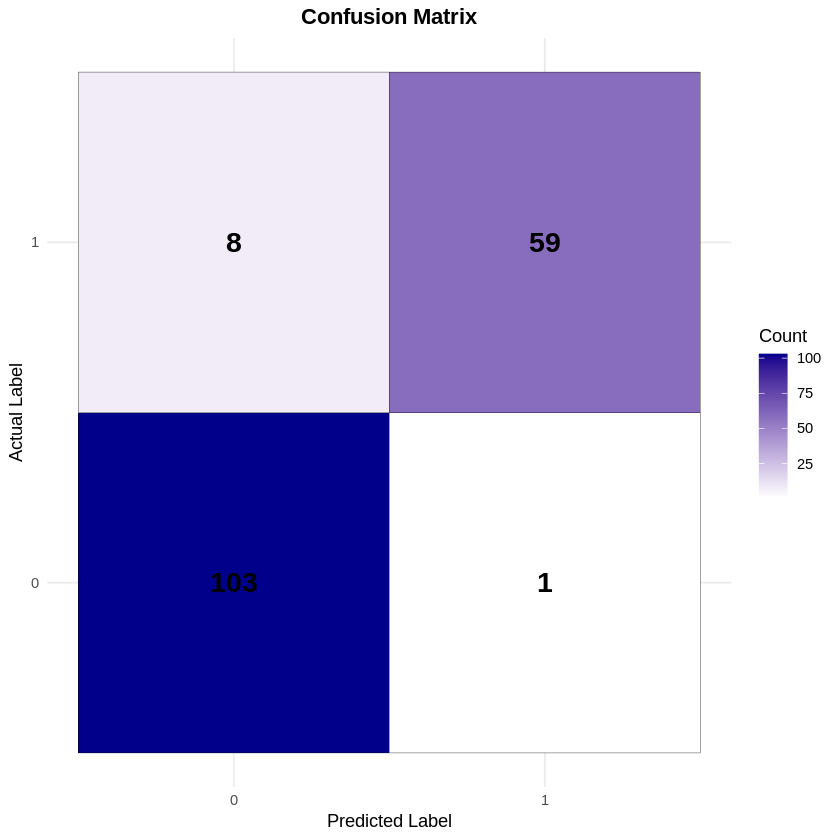

In [22]:
# Plot Confusion Matrix
cm_df <- as.data.frame(as.table(conf_matrix))
colnames(cm_df) <- c("Actual", "Predicted", "Count")

ggplot(data = cm_df, aes(x = Predicted, y = Actual, fill = Count)) +
  geom_tile(color = "black") +
  geom_text(aes(label = Count), color = "black", size = 6, fontface = "bold") +
  scale_fill_gradient(low = "white", high = "darkblue") +
  labs(title = "Confusion Matrix", x = "Predicted Label", y = "Actual Label") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Performance Evaluation Metrics

In [23]:
# Compute Metrics
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)
f1_score <- 2 * (precision * recall) / (precision + recall)
specificity <- TN / (TN + FP)
accuracy <- (TP + TN) / (TP + TN + FP + FN)

cat("\nPrecision:", round(precision, 4))
cat("\nRecall (Sensitivity):", round(recall, 4))
cat("\nSpecificity:", round(specificity, 4))
cat("\nF1-Score:", round(f1_score, 4))
cat("\nAccuracy:", round(accuracy, 4))


Precision: 0.9833
Recall (Sensitivity): 0.8806
Specificity: 0.9904
F1-Score: 0.9291
Accuracy: 0.9474

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



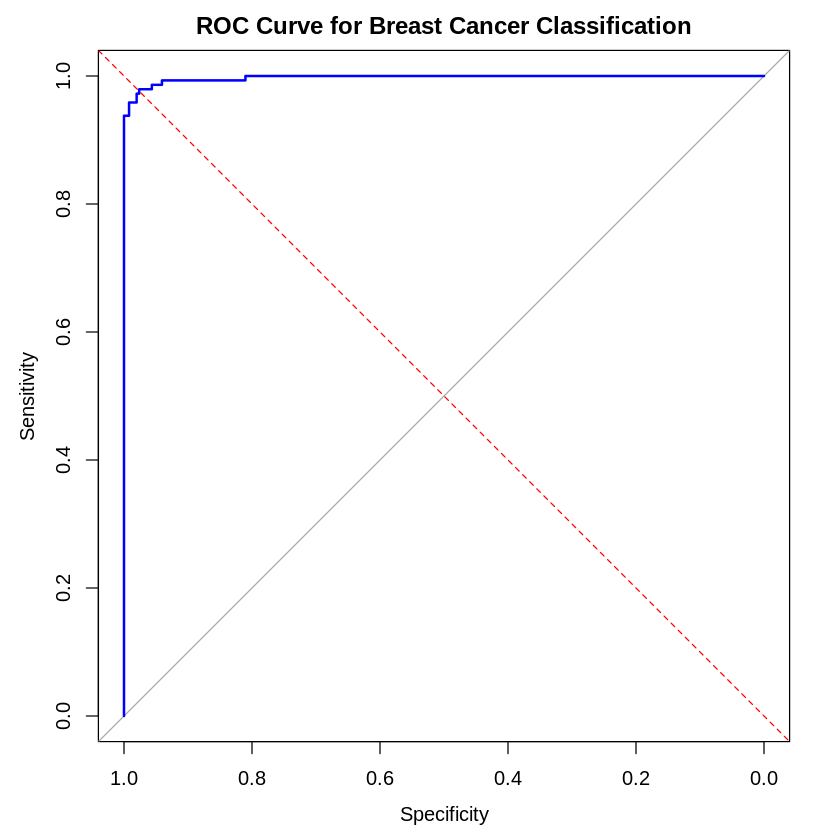

In [27]:
install.packages("pROC")
library(pROC)

# Compute ROC curve
roc_obj <- roc(train_data$Diagnosis, predict(model, train_data, type = "response"))

# Plot ROC curve
plot(roc_obj, col = "blue", main = "ROC Curve for Breast Cancer Classification")
abline(a = 0, b = 1, lty = 2, col = "red")  # Diagonal reference line


### Precision-Recall Curve

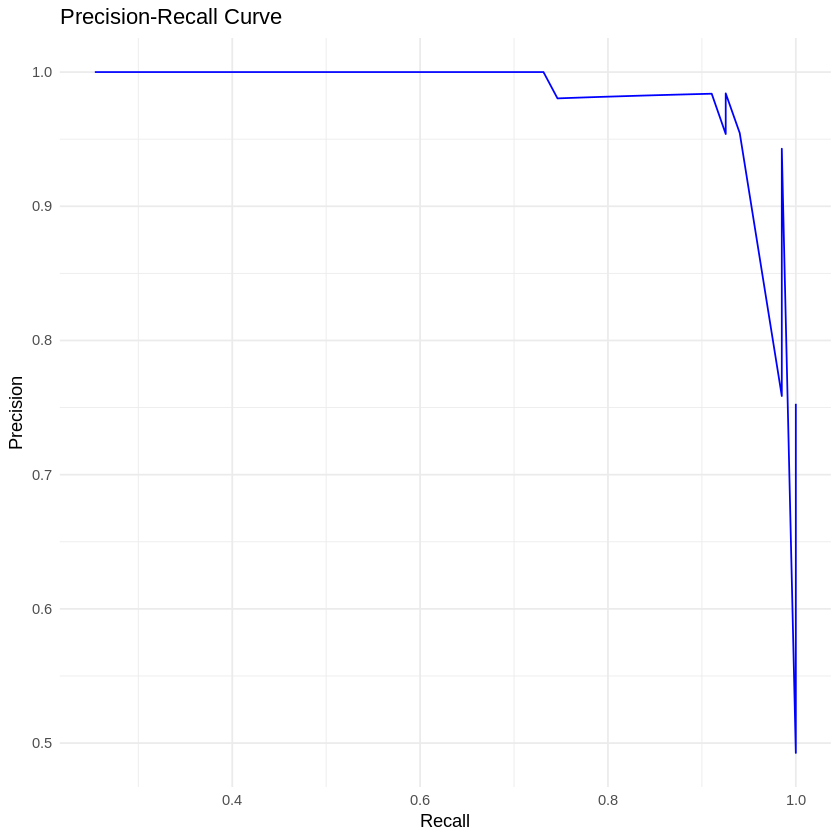

In [24]:
# Compute Precision-Recall values
precision <- c()
recall <- c()
thresholds <- seq(0, 1, by = 0.01)

for (t in thresholds) {
  pred_labels <- ifelse(pred_probs > t, 1, 0)
  TP <- sum(actual == 1 & pred_labels == 1)
  FP <- sum(actual == 0 & pred_labels == 1)
  FN <- sum(actual == 1 & pred_labels == 0)

  prec <- TP / (TP + FP)
  rec <- TP / (TP + FN)

  precision <- c(precision, prec)
  recall <- c(recall, rec)
}

# Convert to DataFrame
pr_df <- data.frame(Recall = recall, Precision = precision)

# Plot PR Curve
ggplot(pr_df, aes(x = Recall, y = Precision)) +
  geom_line(color = "blue") +
  labs(title = "Precision-Recall Curve", x = "Recall", y = "Precision") +
  theme_minimal()


### Summary

The dataset, consisting of 569 rows and 31 columns, was preprocessed by removing the ID column and converting the diagnosis column into binary values (Malignant = 1, Benign = 0). After transforming the data, it was saved as a new CSV file.

A linear regression model was trained on a 70-30 train-test split. The model's performance was evaluated using a confusion matrix, precision, recall, F1-score, ROC curve, and AUC score. The chosen classification threshold impacts model sensitivity and specificity, which is crucial for cancer detection.

Due to the high dimensionality of the dataset, plotting the logistic regression decision boundary is not feasible. However, PCA can be used to reduce dimensionality for visualization.